### Laura Daniela Espinosa Maca

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
# missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

## 1.  Contexto del problema

Usted trabaja en el departamento de estadísticas e información institucional de la Institución Educando Líderes, la cual ofrece programas de nivel técnico profesional y tecnológico. Se le ha encomendado la misión de analizar los resultados de la Prueba Saber TyT (es la prueba homóloga al Saber Pro, pero aplicada en técnico y tecnológico). Para ello, se le entrega una base de datos que proviene del Icfes (la del periodo 2016)

Su misión entonces es entregar un informe sobre la calidad y la preparación de los datos, de tal manera que el análisis de los resultados pueda llevarse a cabo en una segunda etapa. Si existen anomalías, la idea es que a partir de dicho informe, se construya un derecho de petición al Icfes para informar sobre las anomalías y solicitar información que permita dar solución a los problemas.

## 2. Descripción general del dataset

In [2]:
df = pd.read_csv("SABERTYT20162.csv", encoding='latin1', sep=';')
df.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_ESTADOCIVIL,ESTU_TIENE_ETNIA,ESTU_ETNIA,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,ESTU_ESTADO,INSE,NSE
0,CC,1 COLOMBIA,M,15/08/1990,20164,EK201640024941,ESTUDIANTE,UNIÓN LIBRE,NO,NaN,...,A2,79,59,121.0,4.0,87.0,85.0,PUBLICAR,"57,14241052",NSE3
1,CC,1 COLOMBIA,M,26/09/1990,20164,EK201640012159,ESTUDIANTE,SOLTERO,NaN,NaN,...,A2,75,74,123.0,4.0,89.0,87.0,PUBLICAR,"65,76637176",NSE4
2,CC,1 COLOMBIA,F,28/10/1994,20164,EK201640041435,ESTUDIANTE,SOLTERO,NO,NaN,...,B1,97,98,99.0,2.0,43.0,44.0,PUBLICAR,"47,68199591",NSE2
3,CC,1 COLOMBIA,F,24/09/1979,20164,EK201640003654,ESTUDIANTE,UNIÓN LIBRE,NO,NaN,...,A1,32,30,75.0,1.0,13.0,11.0,PUBLICAR,"55,56398024",NSE3
4,CC,1 COLOMBIA,M,6/07/1988,20164,EK201640018456,ESTUDIANTE,SOLTERO,NO,NaN,...,A1-,15,19,86.0,2.0,29.0,34.0,PUBLICAR,"27,01330074",NSE1


In [3]:
df.shape

(53040, 104)

In [4]:
df.dtypes

ESTU_TIPODOCUMENTO           object
ESTU_NACIONALIDAD            object
ESTU_GENERO                  object
ESTU_FECHANACIMIENTO         object
PERIODO                       int64
                             ...   
MOD_COMUNI_ESCRITA_PNAL     float64
MOD_COMUNI_ESCRITA_PGREF    float64
ESTU_ESTADO                  object
INSE                         object
NSE                          object
Length: 104, dtype: object

In [5]:
for col in df.columns:
    print("Columna: ", col, "[", df[col].nunique(), "]")
    print(df[col].sort_values().unique())

Columna:  ESTU_TIPODOCUMENTO [ 6 ]
['CC' 'CE' 'CR' 'PC' 'PE' 'TI']
Columna:  ESTU_NACIONALIDAD [ 21 ]
['1 COLOMBIA' '112 JAPÓN' '118 COREA DEL NORTE' '119 COREA DEL SUR'
 '12 ARGENTINA' '144 MÉXICO' '167 OMÁN' '171 PANAMÁ' '174 PERÚ'
 '209 ESPAÑA' '236 ESTADOS UNIDOS' '241 VENEZUELA' '3 ALAND' '46 CHILE'
 '50 COMORAS' '55 COSTA DE MARFIL' '64 REPÚBLICA DOMINICANA' '65 ECUADOR'
 '67 EL SALVADOR' '83 ALEMANIA' '96 HAITI']
Columna:  ESTU_GENERO [ 2 ]
['F' 'M' nan]
Columna:  ESTU_FECHANACIMIENTO [ 10104 ]
['1/01/1956' '1/01/1972' '1/01/1974' ... '9/12/2004' '9/12/2005' nan]
Columna:  PERIODO [ 1 ]
[20164]
Columna:  ESTU_CONSECUTIVO [ 53040 ]
['EK201640000012' 'EK201640000014' 'EK201640000015' ... 'EK201640057165'
 'EK201640057166' 'EK201640057167']
Columna:  ESTU_ESTUDIANTE [ 1 ]
['ESTUDIANTE']
Columna:  ESTU_ESTADOCIVIL [ 4 ]
['CASADO' 'SEPARADO / VIUDO' 'SOLTERO' 'UNIÓN LIBRE' nan]
Columna:  ESTU_TIENE_ETNIA [ 2 ]
['NO' 'SI' nan]
Columna:  ESTU_ETNIA [ 18 ]
['1 Comunidad afrodescendiente

['AMAZONAS' 'ANTIOQUIA' 'ARAUCA' 'ATLANTICO' 'BOGOTA' 'BOLIVAR' 'BOYACA'
 'CALDAS' 'CAQUETA' 'CASANARE' 'CAUCA' 'CESAR' 'CHOCO' 'CORDOBA'
 'CUNDINAMARCA' 'EXTRANJERO' 'GUAINIA' 'GUAVIARE' 'HUILA' 'LA GUAJIRA'
 'MAGDALENA' 'META' 'NARIÑO' 'NORTE SANTANDER' 'PUTUMAYO' 'QUINDIO'
 'RISARALDA' 'SAN ANDRES' 'SANTANDER' 'SUCRE' 'TOLIMA' 'VALLE' 'VAUPES'
 'VICHADA' nan]
Columna:  ESTU_COD_RESIDE_DEPTO [ 34 ]
[5.0000e+00 8.0000e+00 1.1000e+01 1.3000e+01 1.5000e+01 1.7000e+01
 1.8000e+01 1.9000e+01 2.0000e+01 2.3000e+01 2.5000e+01 2.7000e+01
 4.1000e+01 4.4000e+01 4.7000e+01 5.0000e+01 5.2000e+01 5.4000e+01
 6.3000e+01 6.6000e+01 6.8000e+01 7.0000e+01 7.3000e+01 7.6000e+01
 8.1000e+01 8.5000e+01 8.6000e+01 8.8000e+01 9.1000e+01 9.4000e+01
 9.5000e+01 9.7000e+01 9.9000e+01 9.9999e+04        nan]
Columna:  ESTU_COLE_TERMINO [ 6388 ]
['86/02 INSTITUCION EDUCATIVA LA LEONERA  ITA FARALLONES'
 'ABSALON FERNANDEZ DE SOTO' 'ABSALON TORRES CAMACHO' ...
 'VICTOR MANUEL CHAUX VILLAMIL (sede principal)' 'V

TypeError: '<' not supported between instances of 'str' and 'int'

In [6]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ESTU_TIPODOCUMENTO
False    53040
Name: ESTU_TIPODOCUMENTO, dtype: int64

ESTU_NACIONALIDAD
False    53040
Name: ESTU_NACIONALIDAD, dtype: int64

ESTU_GENERO
False    53038
True         2
Name: ESTU_GENERO, dtype: int64

ESTU_FECHANACIMIENTO
False    53039
True         1
Name: ESTU_FECHANACIMIENTO, dtype: int64

PERIODO
False    53040
Name: PERIODO, dtype: int64

ESTU_CONSECUTIVO
False    53040
Name: ESTU_CONSECUTIVO, dtype: int64

ESTU_ESTUDIANTE
False    53040
Name: ESTU_ESTUDIANTE, dtype: int64

ESTU_ESTADOCIVIL
False    52990
True        50
Name: ESTU_ESTADOCIVIL, dtype: int64

ESTU_TIENE_ETNIA
False    48707
True      4333
Name: ESTU_TIENE_ETNIA, dtype: int64

ESTU_ETNIA
True     49937
False     3103
Name: ESTU_ETNIA, dtype: int64

ESTU_LIMITA_MOTRIZ
True     52994
False       46
Name: ESTU_LIMITA_MOTRIZ, dtype: int64

ESTU_LIMITA_INVIDENTE
True     53036
False        4
Name: ESTU_LIMITA_INVIDENTE, dtype: int64

ESTU_LIMITA_CONDICIONESPECIAL
True     53033
False        7
Name: EST

La base de datos corresponde a las pruebas del ICFES Saber TYT del periodo 2016, tiene en total 53040 registros de estudiantes que tomaron la prueba y un total de 104 variables en las cuales nos relacionan información sociodemográfica, resultados obtenidos en cada una de las pruebas, entre otras. Además, tenemos valores faltantes, más adelante tomaremos medidas con relación a estos.

## 3. Valores erroneos y atípicos

En el estudio se plantea tener en cuenta, además de los puntajes, la edad, el género, la étnia, el tema de discapacidad y el índice socioeconómico.

Tenga en cuenta las siguientes recomendaciones:

En la columna "ESTU_ESTADO" se especifica si el resultado está listo para ser publicado ("PUBLICAR") o si el resultado está en revisión ("VALIDEZ OFICINA JURÍDICA"). Solo interesa trabajar con los que están listos para publicarse.

Para este estudio, solo interesan los estudiantes de nacionalidad colombiana.

Los niveles de inglés, según el Icfes, son A1-, A1, A2, B1 y B2, en dicho orden (de izquierda a derecha aumenta el nivel de desempeño).



In [7]:
df_act = df[['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_TIENE_ETNIA', 'ESTU_ETNIA', 'ESTU_LIMITA_MOTRIZ',
             'ESTU_LIMITA_INVIDENTE', 'ESTU_LIMITA_CONDICIONESPECIAL', 'ESTU_LIMITA_SORDO', 'ESTU_LIMITA_AUTISMO', 
             'FAMI_ESTRATO_VIVIENDA', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT',
            'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_COMUNI_ESCRITA_PUNT', 'ESTU_ESTADO', 'INSE', 'NSE']]
df_act.head(10)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENE_ETNIA,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_AUTISMO,FAMI_ESTRATO_VIVIENDA,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,ESTU_ESTADO,INSE,NSE
0,1 COLOMBIA,M,15/08/1990,NO,NaN,NaN,NaN,NaN,NaN,NaN,ESTRATO 3,80,114,100,115,A2,121.0,PUBLICAR,"57,14241052",NSE3
1,1 COLOMBIA,M,26/09/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESTRATO 3,122,112,100,112,A2,123.0,PUBLICAR,"65,76637176",NSE4
2,1 COLOMBIA,F,28/10/1994,NO,NaN,NaN,NaN,NaN,NaN,NaN,ESTRATO 3,115,117,123,144,B1,99.0,PUBLICAR,"47,68199591",NSE2
3,1 COLOMBIA,F,24/09/1979,NO,NaN,NaN,NaN,NaN,NaN,NaN,ESTRATO 1,82,101,85,88,A1,75.0,PUBLICAR,"55,56398024",NSE3
4,1 COLOMBIA,M,6/07/1988,NO,NaN,NaN,NaN,NaN,NaN,NaN,ESTRATO 2,95,106,84,79,A1-,86.0,PUBLICAR,"27,01330074",NSE1
5,1 COLOMBIA,M,31/12/1992,NO,NaN,NaN,NaN,NaN,NaN,NaN,ESTRATO 1,134,121,123,116,A2,105.0,PUBLICAR,"50,76707191",NSE2
6,1 COLOMBIA,F,19/04/1975,SI,19 Otro grupo étnico minoritario,NaN,NaN,NaN,NaN,NaN,ESTRATO 1,58,70,68,76,A1-,99.0,PUBLICAR,"45,54980331",NSE1
7,1 COLOMBIA,M,1/04/1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESTRATO 2,87,61,81,84,A1-,84.0,PUBLICAR,"55,05894035",NSE2
8,1 COLOMBIA,M,20/12/1988,NO,NaN,NaN,NaN,NaN,NaN,NaN,ESTRATO 3,113,109,109,94,A1,118.0,PUBLICAR,"60,17477413",NSE4
9,1 COLOMBIA,F,30/12/1997,NO,NaN,NaN,NaN,NaN,NaN,NaN,ESTRATO 3,90,121,85,137,B1,127.0,PUBLICAR,"48,95934023",NSE2


* ***Edad***

In [8]:
df_act = df_act[(df_act['ESTU_ESTADO']=='PUBLICAR') & (df_act['ESTU_NACIONALIDAD']=='1 COLOMBIA')]

In [9]:
df_act.dtypes

ESTU_NACIONALIDAD                 object
ESTU_GENERO                       object
ESTU_FECHANACIMIENTO              object
ESTU_TIENE_ETNIA                  object
ESTU_ETNIA                        object
ESTU_LIMITA_MOTRIZ                object
ESTU_LIMITA_INVIDENTE             object
ESTU_LIMITA_CONDICIONESPECIAL     object
ESTU_LIMITA_SORDO                 object
ESTU_LIMITA_AUTISMO               object
FAMI_ESTRATO_VIVIENDA             object
MOD_RAZONA_CUANTITAT_PUNT          int64
MOD_LECTURA_CRITICA_PUNT           int64
MOD_COMPETEN_CIUDADA_PUNT          int64
MOD_INGLES_PUNT                    int64
MOD_INGLES_DESEM                  object
MOD_COMUNI_ESCRITA_PUNT          float64
ESTU_ESTADO                       object
INSE                              object
NSE                               object
dtype: object

In [10]:
df_act['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df_act['ESTU_FECHANACIMIENTO'], format = "%d/%m/%Y")

In [11]:
df_act.dtypes

ESTU_NACIONALIDAD                        object
ESTU_GENERO                              object
ESTU_FECHANACIMIENTO             datetime64[ns]
ESTU_TIENE_ETNIA                         object
ESTU_ETNIA                               object
ESTU_LIMITA_MOTRIZ                       object
ESTU_LIMITA_INVIDENTE                    object
ESTU_LIMITA_CONDICIONESPECIAL            object
ESTU_LIMITA_SORDO                        object
ESTU_LIMITA_AUTISMO                      object
FAMI_ESTRATO_VIVIENDA                    object
MOD_RAZONA_CUANTITAT_PUNT                 int64
MOD_LECTURA_CRITICA_PUNT                  int64
MOD_COMPETEN_CIUDADA_PUNT                 int64
MOD_INGLES_PUNT                           int64
MOD_INGLES_DESEM                         object
MOD_COMUNI_ESCRITA_PUNT                 float64
ESTU_ESTADO                              object
INSE                                     object
NSE                                      object
dtype: object

In [12]:
fecha_prueba = pd.to_datetime('09/10/2016', format = "%d/%m/%Y")
df_act['EDAD_ESTU'] = (fecha_prueba - df_act['ESTU_FECHANACIMIENTO']).astype('<m8[Y]')
df_act.head(10)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENE_ETNIA,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_AUTISMO,...,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,ESTU_ESTADO,INSE,NSE,EDAD_ESTU
0,1 COLOMBIA,M,1990-08-15,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,80,114,100,115,A2,121.0,PUBLICAR,"57,14241052",NSE3,26.0
1,1 COLOMBIA,M,1990-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,112,100,112,A2,123.0,PUBLICAR,"65,76637176",NSE4,26.0
2,1 COLOMBIA,F,1994-10-28,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,115,117,123,144,B1,99.0,PUBLICAR,"47,68199591",NSE2,21.0
3,1 COLOMBIA,F,1979-09-24,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,82,101,85,88,A1,75.0,PUBLICAR,"55,56398024",NSE3,37.0
4,1 COLOMBIA,M,1988-07-06,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,95,106,84,79,A1-,86.0,PUBLICAR,"27,01330074",NSE1,28.0
5,1 COLOMBIA,M,1992-12-31,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,134,121,123,116,A2,105.0,PUBLICAR,"50,76707191",NSE2,23.0
6,1 COLOMBIA,F,1975-04-19,SI,19 Otro grupo étnico minoritario,NaN,NaN,NaN,NaN,NaN,...,58,70,68,76,A1-,99.0,PUBLICAR,"45,54980331",NSE1,41.0
7,1 COLOMBIA,M,1995-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87,61,81,84,A1-,84.0,PUBLICAR,"55,05894035",NSE2,21.0
8,1 COLOMBIA,M,1988-12-20,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,113,109,109,94,A1,118.0,PUBLICAR,"60,17477413",NSE4,27.0
9,1 COLOMBIA,F,1997-12-30,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,90,121,85,137,B1,127.0,PUBLICAR,"48,95934023",NSE2,18.0


In [13]:
df_act.dtypes

ESTU_NACIONALIDAD                        object
ESTU_GENERO                              object
ESTU_FECHANACIMIENTO             datetime64[ns]
ESTU_TIENE_ETNIA                         object
ESTU_ETNIA                               object
ESTU_LIMITA_MOTRIZ                       object
ESTU_LIMITA_INVIDENTE                    object
ESTU_LIMITA_CONDICIONESPECIAL            object
ESTU_LIMITA_SORDO                        object
ESTU_LIMITA_AUTISMO                      object
FAMI_ESTRATO_VIVIENDA                    object
MOD_RAZONA_CUANTITAT_PUNT                 int64
MOD_LECTURA_CRITICA_PUNT                  int64
MOD_COMPETEN_CIUDADA_PUNT                 int64
MOD_INGLES_PUNT                           int64
MOD_INGLES_DESEM                         object
MOD_COMUNI_ESCRITA_PUNT                 float64
ESTU_ESTADO                              object
INSE                                     object
NSE                                      object
EDAD_ESTU                               

In [14]:
np.sort(df_act['EDAD_ESTU'].unique())

array([-8., -2., -1.,  0.,  1.,  2.,  5.,  7.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 70., 71., nan])

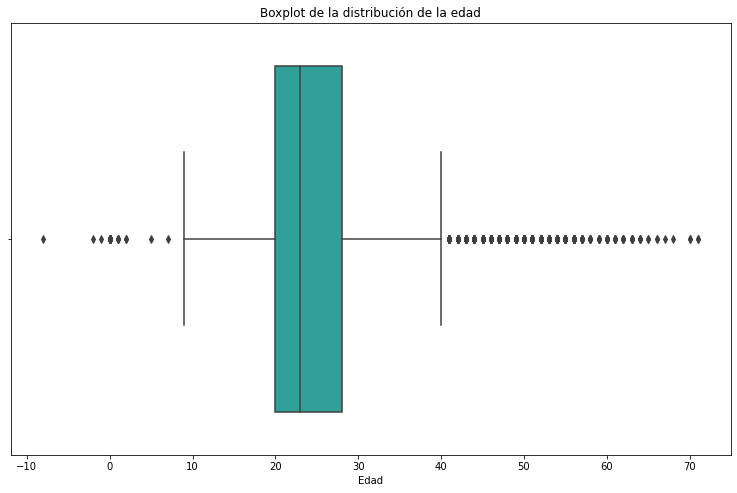

CPU times: total: 156 ms
Wall time: 402 ms


In [15]:
%%time
fig_box2 = plt.figure(figsize=(10,6)) 
ax = fig_box2.add_axes([0,0,1,1])
ax=sns.boxplot(x=df_act['EDAD_ESTU'],color="lightseagreen")
# ax = sns.swarmplot(x=var_cuanti['edad_Cal'],color='black')
plt.title('Boxplot de la distribución de la edad')
plt.xlabel('Edad')
plt.show()

Con relación a la fecha de nacimiento se puede notar que la variable no tenía el formato correcto, por ende, se modificó para que se tratara como una fecha y así con la fecha del momento cuando se aplicó la prueba poder calcular cual era la edad del estudiante al momento de realizar la prueba. También pudimos notar al momento de calcular la edad que había un NA y edades atípicas, es por eso que para estos dos casos se decidió imputar por la media aquellas edades menores de 10 años y mayores de 40 años.

In [16]:
# Promedio/media de la columna perdida-promedio-anual
avg_edad = df_act['EDAD_ESTU'].astype("float").mean()

# Reemplazo de NaN por la media, columna perdida-promedio-anual
df_act['EDAD_ESTU'].replace(np.nan, avg_edad, inplace=True)

# Valores a reemplazar
lista = [-8., -2., -1.,  0.,  1.,  2.,  5.,  7., 9., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 70., 71.]
df_act['EDAD_ESTU'].replace(lista, avg_edad, inplace=True)

# Cambiamos el formato a entero
df_act['EDAD_ESTU'] = df_act['EDAD_ESTU'].astype("int")

In [17]:
df_act.head()

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENE_ETNIA,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL,ESTU_LIMITA_SORDO,ESTU_LIMITA_AUTISMO,...,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,ESTU_ESTADO,INSE,NSE,EDAD_ESTU
0,1 COLOMBIA,M,1990-08-15,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,80,114,100,115,A2,121.0,PUBLICAR,"57,14241052",NSE3,26
1,1 COLOMBIA,M,1990-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,112,100,112,A2,123.0,PUBLICAR,"65,76637176",NSE4,26
2,1 COLOMBIA,F,1994-10-28,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,115,117,123,144,B1,99.0,PUBLICAR,"47,68199591",NSE2,21
3,1 COLOMBIA,F,1979-09-24,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,82,101,85,88,A1,75.0,PUBLICAR,"55,56398024",NSE3,37
4,1 COLOMBIA,M,1988-07-06,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,95,106,84,79,A1-,86.0,PUBLICAR,"27,01330074",NSE1,28


* ***Nivel de Inglés***

In [18]:
df_act['MOD_INGLES_DESEM'].value_counts()

A1     18799
A2     13540
A1-    12965
B1      5995
B2      1366
Name: MOD_INGLES_DESEM, dtype: int64

In [19]:
df_act['META_ESTU'] = np.where((df_act['MOD_INGLES_DESEM']=='B1') | (df_act['MOD_INGLES_DESEM']=='B2'), 'CUMPLIO', 'NO CUMPLIO')

In [20]:
tabla_freq=(pd.crosstab(index=df_act['META_ESTU'],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,META_ESTU,Freq. Abs.,Freq. Rel.
0,NO CUMPLIO,45304,0.86023
1,CUMPLIO,7361,0.13977


Se puede observar que al rededor del 14% de los estudiantes que presentaron la prueba Saber TYT cumplieron con la meta que había establecido el Ministerio de Educación Nacional de que las instituciones debían de llevar a sus estudiantes aun nivel de inglés de B1 o B2.

* ***Étnia***

In [21]:
df_act['ESTU_ETNIA'].unique()

array([nan, '19 Otro grupo étnico minoritario',
       '1 Comunidad afrodescendiente', '100 Ninguno', '4 Paez', '9 Pasto',
       '11 Inga', '7 Pijao', '2 Raizal', '12 Tucano', '15 Palenquero',
       '8 Wayúu', '18 Zenú', '6 Embera ', '10 Cancuamo', '17 Guambiano',
       '3 Comunidad Rom (gitana)', '13 Huitoto', '16 Arhuaco'],
      dtype=object)

In [22]:
df_act['ESTU_TIENE_ETNIA'].unique()

array(['NO', nan, 'SI'], dtype=object)

In [23]:
df_si = df_act[df_act['ESTU_TIENE_ETNIA'] == 'SI']
df_si['ESTU_ETNIA'].unique()

array(['19 Otro grupo étnico minoritario', '1 Comunidad afrodescendiente',
       '100 Ninguno', '4 Paez', '9 Pasto', '11 Inga', '7 Pijao', nan,
       '2 Raizal', '12 Tucano', '15 Palenquero', '8 Wayúu', '18 Zenú',
       '6 Embera ', '10 Cancuamo', '17 Guambiano',
       '3 Comunidad Rom (gitana)', '13 Huitoto', '16 Arhuaco'],
      dtype=object)

In [24]:
df_no = df_act[df_act['ESTU_TIENE_ETNIA'] == 'NO']
df_no['ESTU_ETNIA'].unique()

array([nan, '100 Ninguno', '19 Otro grupo étnico minoritario',
       '1 Comunidad afrodescendiente', '9 Pasto', '18 Zenú', '7 Pijao',
       '2 Raizal'], dtype=object)

In [25]:
df_na = df_act[df_act['ESTU_TIENE_ETNIA'].isna()]
df_na['ESTU_ETNIA'].unique()

array([nan], dtype=object)

Se detalla que entre las variables en las cuales el estudiante indica si pertenece a un grupo étnico y que especifique cual es no hay concordancia, por ejemplo, hay estudiantes que indicaron pertenecer a un grupo pero no especificaron en cual e incluso indicaron que ninguno, en otro caso hubieron estudiantes que dijeron que no pertenecían a un grupo pero señalaron un grupo de pertenencia.

In [26]:
tabla_freq1=(pd.crosstab(index=df_act['ESTU_ETNIA'],columns="count")).reset_index()
tabla_freq1['Freq. Rel.']=tabla_freq1['count']/sum(tabla_freq1['count'])
tabla_freq1.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq1=tabla_freq1.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq1

col_0,ESTU_ETNIA,Freq. Abs.,Freq. Rel.
0,100 Ninguno,1631,0.528516
1,1 Comunidad afrodescendiente,681,0.220674
2,19 Otro grupo étnico minoritario,445,0.144200
3,4 Paez,72,0.023331
4,18 Zenú,57,0.018471
5,9 Pasto,42,0.013610
6,2 Raizal,40,0.012962
7,6 Embera,32,0.010369
8,7 Pijao,21,0.006805
9,8 Wayúu,19,0.006157


* ***Discapacidad***

In [27]:
df_act['ESTU_LIMITA_AUTISMO'].unique()

array([nan, 'x'], dtype=object)

In [28]:
df_act['ESTU_LIMITA_CONDICIONESPECIAL'].unique()

array([nan, 'x'], dtype=object)

In [29]:
df_act['ESTU_LIMITA_INVIDENTE'].unique()

array([nan, 'x'], dtype=object)

In [30]:
df_act['ESTU_LIMITA_MOTRIZ'].unique()

array([nan, 'x'], dtype=object)

In [31]:
df_act['ESTU_LIMITA_SORDO'].unique()

array([nan, 'x'], dtype=object)

In [32]:
#Transformador personalizado que extrae columnas pasadas como argumento a su constructor

class StandarTransformer():

    #Class Constructor

    def __init__(self, feature_names):
        self._feature_names = feature_names

    #Return self nada más que hacer aquí

    def fit(self, X, y = None):
        return self

    #Método que describe lo que necesitamos que haga este transformador

    def transform(self, X, y = None ):

        def map_values(val):
            if val in ['x']: return 1
            else: return 0

        X_ = X.copy()
        X_[self._feature_names] = X_[self._feature_names].apply(map_values)

        return  X_

In [33]:
pipeline1 = Pipeline(steps=[("CT", StandarTransformer("ESTU_LIMITA_AUTISMO"))])
result = pipeline1.fit_transform(df_act)
result['ESTU_LIMITA_AUTISMO'].value_counts()

0    52662
1        3
Name: ESTU_LIMITA_AUTISMO, dtype: int64

In [34]:
pipeline1 = Pipeline(steps=[("CT", StandarTransformer("ESTU_LIMITA_CONDICIONESPECIAL"))])
result = pipeline1.fit_transform(df_act)
result['ESTU_LIMITA_CONDICIONESPECIAL'].value_counts()

0    52658
1        7
Name: ESTU_LIMITA_CONDICIONESPECIAL, dtype: int64

In [35]:
pipeline1 = Pipeline(steps=[("CT", StandarTransformer("ESTU_LIMITA_INVIDENTE"))])
result = pipeline1.fit_transform(df_act)
result['ESTU_LIMITA_INVIDENTE'].value_counts()

0    52661
1        4
Name: ESTU_LIMITA_INVIDENTE, dtype: int64

In [36]:
pipeline1 = Pipeline(steps=[("CT", StandarTransformer("ESTU_LIMITA_MOTRIZ"))])
result = pipeline1.fit_transform(df_act)
result['ESTU_LIMITA_MOTRIZ'].value_counts()

0    52619
1       46
Name: ESTU_LIMITA_MOTRIZ, dtype: int64

In [37]:
pipeline1 = Pipeline(steps=[("CT", StandarTransformer("ESTU_LIMITA_SORDO"))])
result = pipeline1.fit_transform(df_act)
result['ESTU_LIMITA_SORDO'].value_counts()

0    52636
1       29
Name: ESTU_LIMITA_SORDO, dtype: int64

In [38]:
df_act['ESTU_DISCAP'] = np.where((df_act['ESTU_LIMITA_AUTISMO']=='x') | (df_act['ESTU_LIMITA_CONDICIONESPECIAL']=='x')
                                 | (df_act['ESTU_LIMITA_INVIDENTE']=='x') | (df_act['ESTU_LIMITA_MOTRIZ']=='x')
                                 | (df_act['ESTU_LIMITA_SORDO']=='x'), 'Discapacitado', 'Ninguna Discap')

In [39]:
tabla_freq3=(pd.crosstab(index=df_act['ESTU_DISCAP'],columns="count")).reset_index()
tabla_freq3['Freq. Rel.']=tabla_freq3['count']/sum(tabla_freq3['count'])
tabla_freq3.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq3=tabla_freq3.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq3

col_0,ESTU_DISCAP,Freq. Abs.,Freq. Rel.
0,Ninguna Discap,52587,0.998519
1,Discapacitado,78,0.001481


In [40]:
df_1 = df_act[(df_act['ESTU_LIMITA_AUTISMO']=='x') & (df_act['ESTU_LIMITA_CONDICIONESPECIAL']=='x') ]
df_1[['ESTU_LIMITA_AUTISMO', 'ESTU_LIMITA_CONDICIONESPECIAL']]

,ESTU_LIMITA_AUTISMO,ESTU_LIMITA_CONDICIONESPECIAL
12056,x,x
44764,x,x


In [41]:
df_1 = df_act[(df_act['ESTU_LIMITA_MOTRIZ']=='x') & (df_act['ESTU_LIMITA_CONDICIONESPECIAL']=='x') ]
df_1[['ESTU_LIMITA_MOTRIZ', 'ESTU_LIMITA_CONDICIONESPECIAL']]

,ESTU_LIMITA_MOTRIZ,ESTU_LIMITA_CONDICIONESPECIAL
1926,x,x
34657,x,x
48940,x,x


In [42]:
df_1 = df_act[(df_act['ESTU_LIMITA_SORDO']=='x') & (df_act['ESTU_LIMITA_MOTRIZ']=='x') ]
df_1[['ESTU_LIMITA_SORDO', 'ESTU_LIMITA_MOTRIZ']]

,ESTU_LIMITA_SORDO,ESTU_LIMITA_MOTRIZ
14323,x,x
31777,x,x
45795,x,x
46104,x,x


In [43]:
df_1 = df_act[(df_act['ESTU_LIMITA_INVIDENTE']=='x') & (df_act['ESTU_LIMITA_CONDICIONESPECIAL']=='x') ]
df_1[['ESTU_LIMITA_INVIDENTE', 'ESTU_LIMITA_CONDICIONESPECIAL']]

,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_CONDICIONESPECIAL
37653,x,x
42185,x,x


En las variables que nos indican si el estudiante presenta alguna clase de comorbilidad se puede observar que la mayoría de los estudiantes con discapacidad señalaron presentar limitación motriz, además, en total había 78 estudiantes (0.15%) que indicaron presentar alguna discapacidad. Adicionalmente, de estos 78, 11 estudiantes indicaron presentar más de 1 discapacidad, por ejemplo, dos estudiantes indicaron presentar autismo y una condición especial, 3 indicaron limitación motriz y una condición especial, 4 de ellos indicaron limitación auditiva y limitación motriz y por ultimo 2 indicaron limitación invidente y una condición especial.

## 4. Distribución de las variables

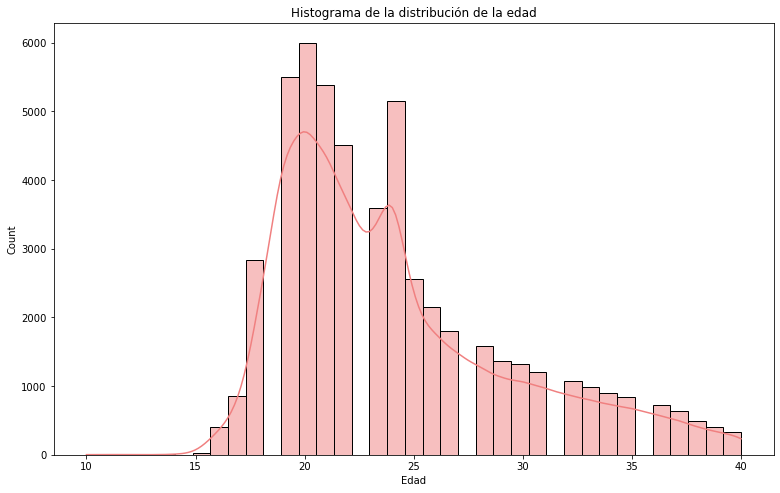

CPU times: total: 766 ms
Wall time: 595 ms


In [44]:
%%time
fig_hist = plt.figure(figsize=(10,6)) 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=df_act['EDAD_ESTU'], kde=True, color="lightcoral", bins=round(1+3.322*np.log(len(df_act['EDAD_ESTU']))))
plt.title('Histograma de la distribución de la edad')
plt.xlabel('Edad')
plt.show()

Se puede observar que en el grafico anterior, la edad de los estudiantes que presentaron la prueba parece tener dos centros uno alrededor de los 20 años y otro entre los 23 y 24 años, también se observa que la edad tiene sesgo a la derecha.

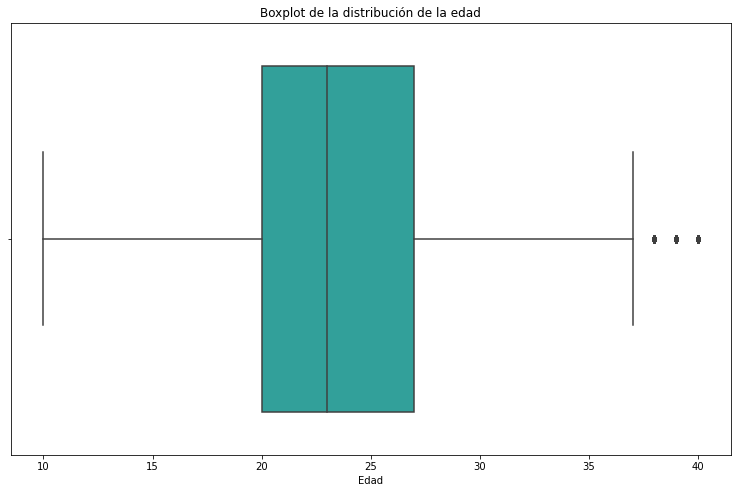

CPU times: total: 78.1 ms
Wall time: 103 ms


In [45]:
%%time
fig_box2 = plt.figure(figsize=(10,6)) 
ax = fig_box2.add_axes([0,0,1,1])
ax=sns.boxplot(x=df_act['EDAD_ESTU'],color="lightseagreen")
# ax = sns.swarmplot(x=var_cuanti['edad_Cal'],color='black')
plt.title('Boxplot de la distribución de la edad')
plt.xlabel('Edad')
plt.show()

Se puede observar (después de la imputación) que siguen apareciendo valores atípicos después de 37 años, aunque en el anterior boxplot estos valores aparecieron después de los 40 años. 

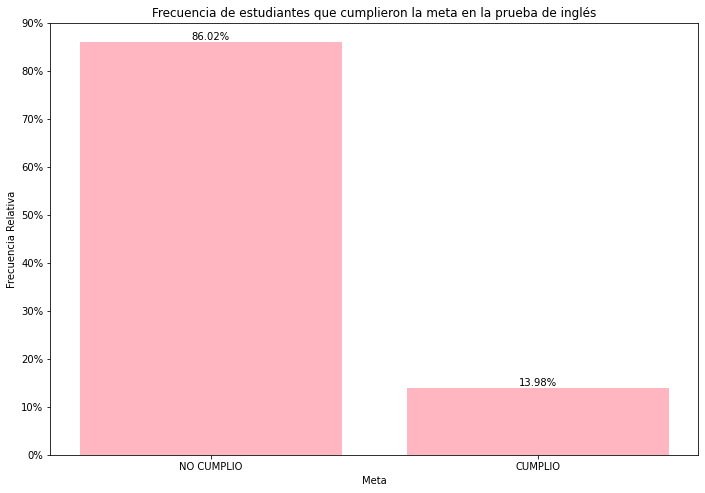

In [46]:
fig_cont_fr = plt.figure()
ax = fig_cont_fr.add_axes([0,0,1.5,1.5])
ax.bar(tabla_freq['META_ESTU'],tabla_freq['Freq. Rel.']*100,color='lightpink')
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.2f%%')  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))  
ax.set(ylim=(0, 90)) 
plt.title("Frecuencia de estudiantes que cumplieron la meta en la prueba de inglés")  
plt.ylabel('Frecuencia Relativa')  
plt.xlabel('Meta')        
plt.show()

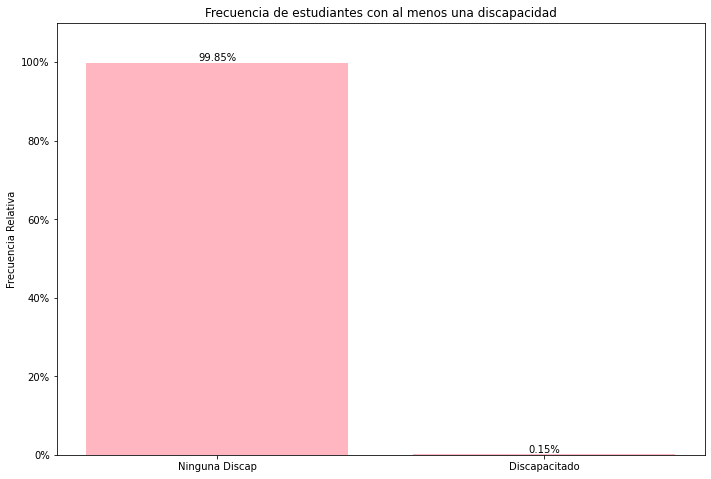

In [47]:
fig_cont_fr = plt.figure()
ax = fig_cont_fr.add_axes([0,0,1.5,1.5])
ax.bar(tabla_freq3['ESTU_DISCAP'],tabla_freq3['Freq. Rel.']*100,color='lightpink')
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.2f%%')  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))  
ax.set(ylim=(0, 110)) 
plt.title("Frecuencia de estudiantes con al menos una discapacidad")  
plt.ylabel('Frecuencia Relativa')  
# plt.xlabel('Meta')        
plt.show()

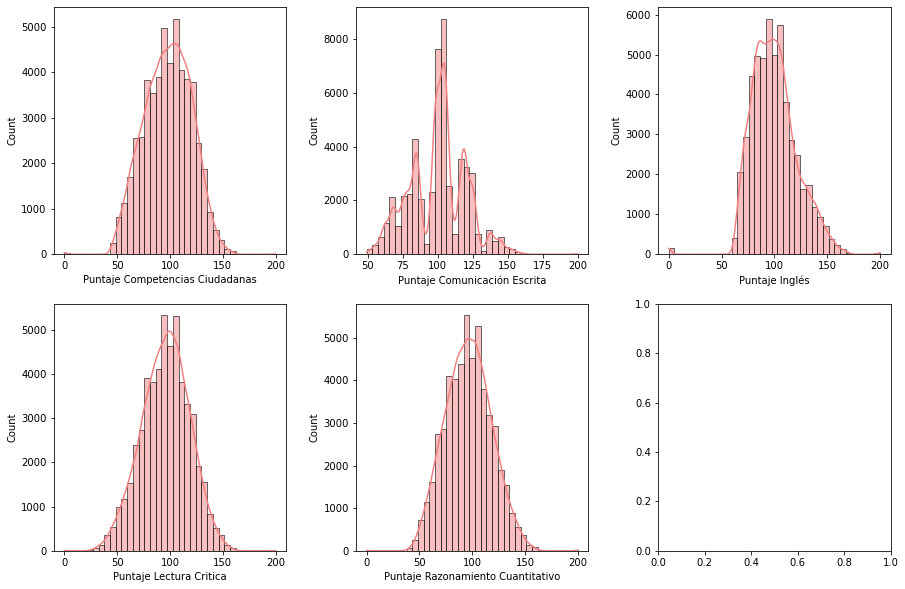

In [48]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.3)

ax1=sns.histplot(x=df_act['MOD_COMPETEN_CIUDADA_PUNT'], kde=True, color="lightcoral", bins=round(1+3.322*np.log(len(df_act['MOD_COMPETEN_CIUDADA_PUNT']))),ax=axs[0][0])
axs[0][0].set_xlabel('Puntaje Competencias Ciudadanas')

ax1=sns.histplot(x=df_act['MOD_COMUNI_ESCRITA_PUNT'], kde=True, color="lightcoral", bins=round(1+3.322*np.log(len(df_act['MOD_COMUNI_ESCRITA_PUNT']))),ax=axs[0][1])
axs[0][1].set_xlabel('Puntaje Comunicación Escrita')

ax1=sns.histplot(x=df_act['MOD_INGLES_PUNT'], kde=True, color="lightcoral", bins=round(1+3.322*np.log(len(df_act['MOD_INGLES_PUNT']))),ax=axs[0][2])
axs[0][2].set_xlabel('Puntaje Inglés')

ax1=sns.histplot(x=df_act['MOD_LECTURA_CRITICA_PUNT'], kde=True, color="lightcoral", bins=round(1+3.322*np.log(len(df_act['MOD_LECTURA_CRITICA_PUNT']))),ax=axs[1][0])
axs[1][0].set_xlabel('Puntaje Lectura Critica')

ax1=sns.histplot(x=df_act['MOD_RAZONA_CUANTITAT_PUNT'], kde=True, color="lightcoral", bins=round(1+3.322*np.log(len(df_act['MOD_RAZONA_CUANTITAT_PUNT']))),ax=axs[1][1])
axs[1][1].set_xlabel('Puntaje Razonamiento Cuantitativo')

plt.show()

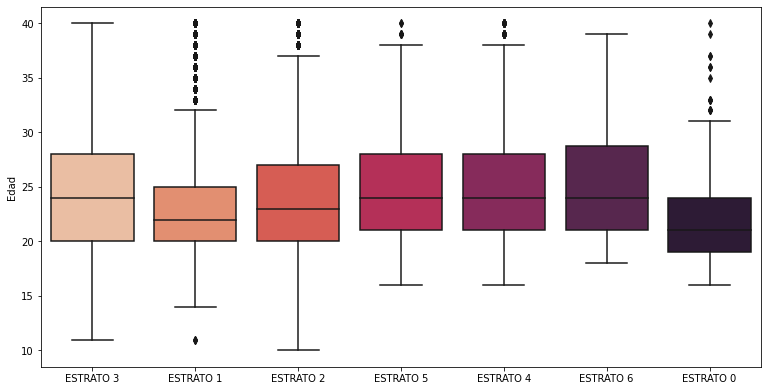

In [49]:
fig_boxplot = plt.figure(figsize=(10,5)) 
ax = fig_boxplot.add_axes([0,0,1,1])
ax=sns.boxplot(x=df_act["FAMI_ESTRATO_VIVIENDA"], y=df_act["EDAD_ESTU"], palette='rocket_r')
plt.ylabel('Edad')   
plt.xlabel('')           
plt.show()

In [50]:
df_act['ESTU_LIMITA_MOTRIZ'] = np.where((df_act['ESTU_LIMITA_MOTRIZ']=='x'), 1, 0)
df_act['ESTU_LIMITA_INVIDENTE'] = np.where((df_act['ESTU_LIMITA_INVIDENTE']=='x'), 1, 0)
df_act['ESTU_LIMITA_CONDICIONESPECIAL'] = np.where((df_act['ESTU_LIMITA_CONDICIONESPECIAL']=='x'), 1, 0)
df_act['ESTU_LIMITA_SORDO'] = np.where((df_act['ESTU_LIMITA_SORDO']=='x'), 1, 0)
df_act['ESTU_LIMITA_AUTISMO'] = np.where((df_act['ESTU_LIMITA_AUTISMO']=='x'), 1, 0)

In [51]:
df_act['FAMI_ESTRATO_VIVIENDA'] = np.where((df_act['FAMI_ESTRATO_VIVIENDA']=='ESTRATO 0'), 0, 
                                   np.where((df_act['FAMI_ESTRATO_VIVIENDA']=='ESTRATO 1'), 1, 
                                    np.where((df_act['FAMI_ESTRATO_VIVIENDA']=='ESTRATO 2'), 2, 
                                     np.where((df_act['FAMI_ESTRATO_VIVIENDA']=='ESTRATO 3'), 3, 
                                      np.where((df_act['FAMI_ESTRATO_VIVIENDA']=='ESTRATO 4'), 4, 
                                       np.where((df_act['FAMI_ESTRATO_VIVIENDA']=='ESTRATO 5'), 5, 
                                        np.where((df_act['FAMI_ESTRATO_VIVIENDA']=='ESTRATO 6'), 6, np.nan)))))))

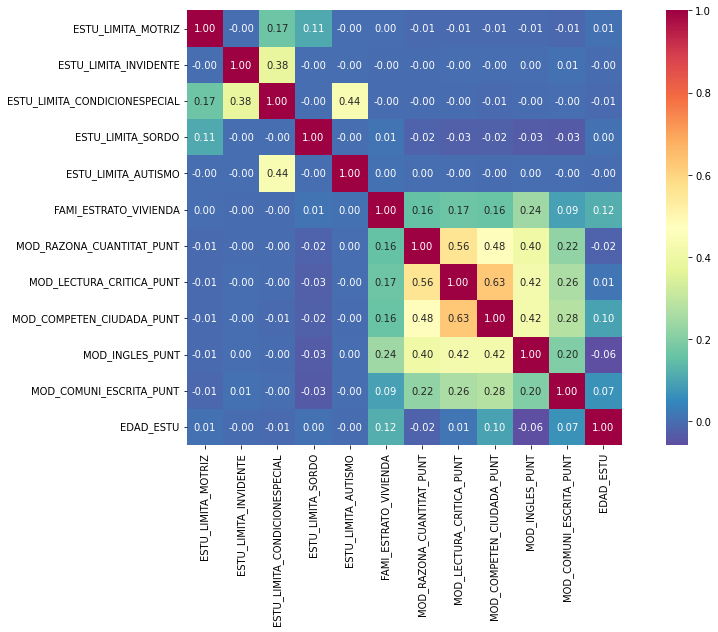

In [52]:
temp = df_act.drop( axis = 1, columns= ['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_TIENE_ETNIA', 
                                    'ESTU_ETNIA', 'MOD_INGLES_DESEM', 'ESTU_ESTADO', 'INSE', 'NSE', 'META_ESTU', 'ESTU_DISCAP'])
corrmat = temp.corr()
fig_cont_fr = plt.figure(figsize=(16,8))
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=temp.columns,
                 xticklabels=temp.columns,
                 cmap="Spectral_r")
plt.show()

## 5. Hallazgos importantes

Como se detalló anteriormente solo aproximadamente el 14% de los estudiantes que presentaron la prueba Saber TYT cumplieron con la meta de obtener un desempeño de B1 o B2.

Solo el 0.15% de los estudiantes que presentaron la prueba Saber TYT, informaron que presentaban al menos una discapacidad.

Los puntajes de las competencias evaluadas a los estudiantes en las pruebas Saber TYT, están en promedio alrededor de 100 puntos, llegando a ser un poco más altos en la competencia de comunicación escrita, en esta podemos observar tres picos, uno alrededor de 80 y 85 puntos, otro alrededor de los 100 puntos y el ultimo entre 135 y 140 puntos.

Con relacion al estrato se puede decir que los estudiantes de estrato 0 fueron los estudiantes mas jovenes en presentar las pruebas y en general las edades estuvieron similares en los demas estratos.

Por ultimo se calculo una correlacion para determinar si existian relaciones entre las variables, se puede observar que se presentaron relaciones bajas a excepcion entre las variables de los puntajes de las competencias de lectura critica y competencias ciudadanas, entre los puntajes de las competencias razonamiento cuantitativo y lectura critica, tambien entre si el estudiante tenia autismo y una condicion especial.